In [ ]:
# import zipfile
# import os

# def unzip_file(zip_file_path, extract_to_path):
#   """Unzips a zip file to a specified directory.

#   Args:
#     zip_file_path: The path to the zip file.
#     extract_to_path: The directory to extract the contents to.
#   """

#   try:
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#       zip_ref.extractall(extract_to_path)
#     print(f"File '{zip_file_path}' unzipped successfully to '{extract_to_path}'.")
#   except FileNotFoundError:
#     print(f"Error: Zip file '{zip_file_path}' not found.")
#   except zipfile.BadZipFile:
#     print(f"Error: '{zip_file_path}' is not a valid zip file.")
#   except Exception as e:
#     print(f"An unexpected error occurred: {e}")

# zip_file_path = "/content/CNN_dataset.zip"
# extract_to_path = "/content"

# os.makedirs(extract_to_path, exist_ok=True)

# unzip_file(zip_file_path, extract_to_path)

File '/content/CNN_dataset.zip' unzipped successfully to '/content'.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the dataset path
dataset_path = '/content/CNN_dataset'

# Count images in each category
categories = os.listdir(dataset_path)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_path))
    print(f"Category: {category}, Number of Images: {num_images}")


Category: HeadCT, Number of Images: 10000
Category: CXR, Number of Images: 10000
Category: ChestCT, Number of Images: 10000
Category: Hand, Number of Images: 10000
Category: AbdomenCT, Number of Images: 10000


In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values
    validation_split=0.2          # Reserve 20% for validation
)

# Create training and validation datasets
train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),       # Resize images to 128x128
    batch_size=32,               # Set batch size
    class_mode='categorical',    # Multi-class classification
    subset='training'            # Training data
)

val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 40000 images belonging to 5 classes.
Found 10000 images belonging to 5 classes.


In [29]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_dir = '/content/CNN_dataset'

test_dir = '/content/test'

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    test_category_path = os.path.join(test_dir, category)

    if not os.path.exists(test_category_path):
        os.makedirs(test_category_path)


    image_files = [os.path.join(category_path, f) for f in os.listdir(category_path)]

    # Split into train (80%) and test (20%)
    _, test_images = train_test_split(image_files, test_size=0.2, random_state=42)

    for test_image in test_images:
        shutil.move(test_image, test_category_path)

total_images = sum([len(os.listdir(os.path.join(dataset_dir, category))) for category in os.listdir(dataset_dir)])

In [43]:
# Analyze class distribution
train_class_counts = np.sum(train_data.classes)
val_class_counts = np.sum(val_data.classes)

print(f"Training Class Distribution: {train_class_counts}")
print(f"Validation Class Distribution: {val_class_counts}")


Training Class Distribution: 80000
Validation Class Distribution: 20000


In [ ]:
# Build a Sequential CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(5, activation='softmax')  # Output layer with 5 categories
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,                    # Set the number of epochs
    validation_data=val_data
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1137s 908ms/step - accuracy: 0.9178 - loss: 0.2445 - val_accuracy: 0.9972 - val_loss: 0.0123
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1157s 904ms/step - accuracy: 0.9941 - loss: 0.0228 - val_accuracy: 0.9980 - val_loss: 0.0068
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1149s 919ms/step - accuracy: 0.9969 - loss: 0.0102 - val_accuracy: 0.9951 - val_loss: 0.0112
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1112s 890ms/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 0.9962 - val_loss: 0.0170
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1100s 880ms/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 0.9988 - val_loss: 0.0031
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1070s 854ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9979 - val_loss: 0.0066
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1097s 878ms/step - accuracy: 0.9986 - loss: 0.0038 - val_accuracy: 0.9986 - val_loss: 0.0050
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1076s 856ms/step - accur

In [14]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 218ms/step - accuracy: 0.9989 - loss: 0.0058
Validation Loss: 0.007838230580091476
Validation Accuracy: 0.9987999796867371


In [39]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_data = test_data_gen.flow_from_directory(
    '/content/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 10000 images belonging to 5 classes.
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 222ms/step - accuracy: 0.9999 - loss: 5.5944e-04
Test Loss: 0.0007967522251419723
Test Accuracy: 0.9998000264167786


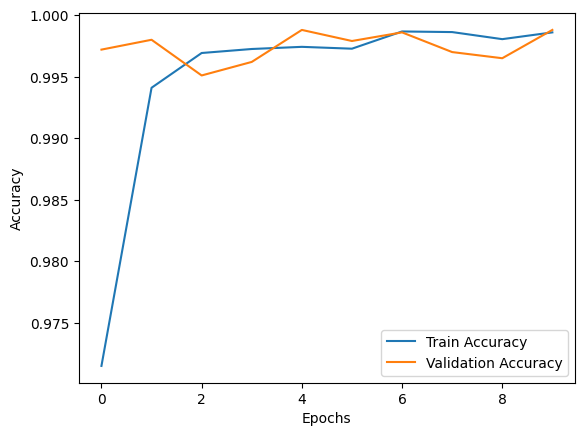

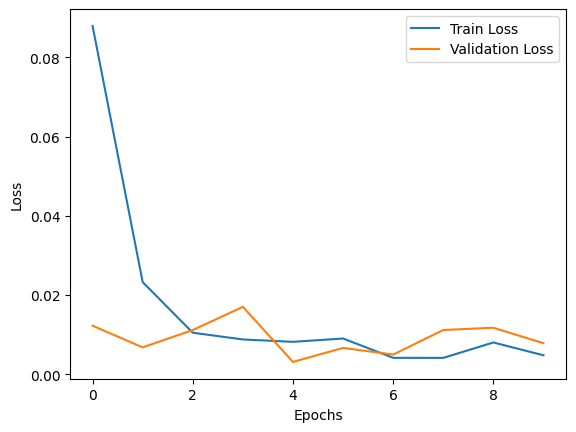

In [15]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


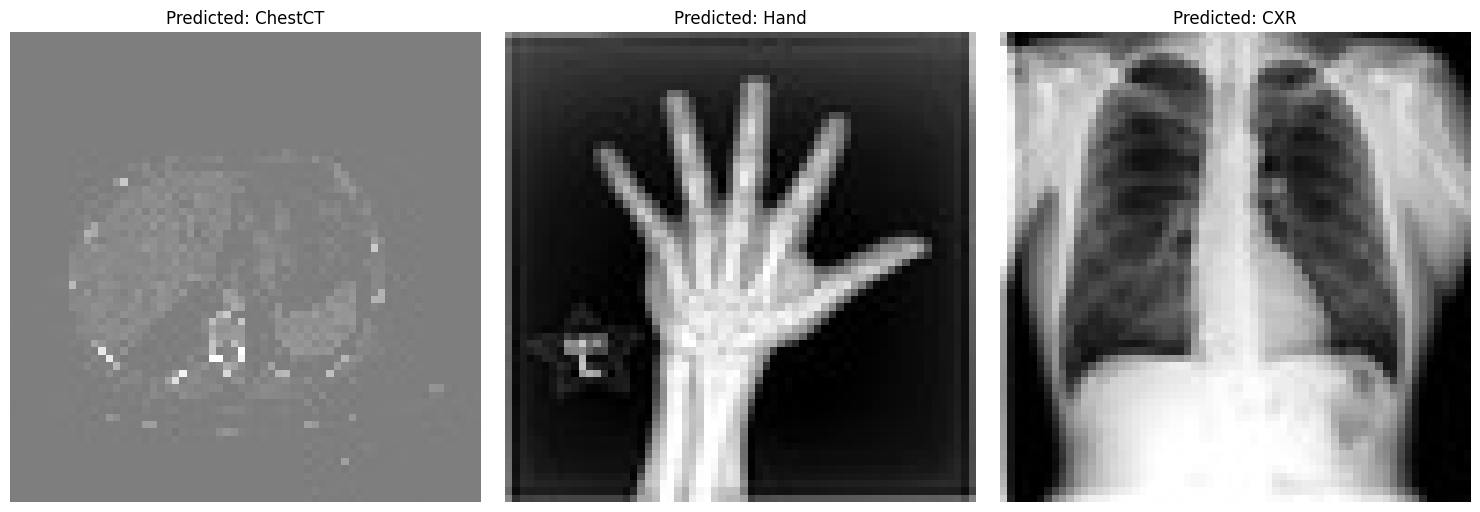

In [28]:
image_paths = [
    '/content/CNN_dataset/ChestCT/000051.jpeg',
    '/content/CNN_dataset/Hand/000052.jpeg',
    '/content/CNN_dataset/CXR/000053.jpeg',
]

class_names = list(train_data.class_indices.keys())
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(image_paths):

    img = image.load_img(img_path, target_size=(128, 128))


    img_array = image.img_to_array(img) / 255.0


    img_array = np.expand_dims(img_array, axis=0)


    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]


    plt.subplot(2, 3, i + 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


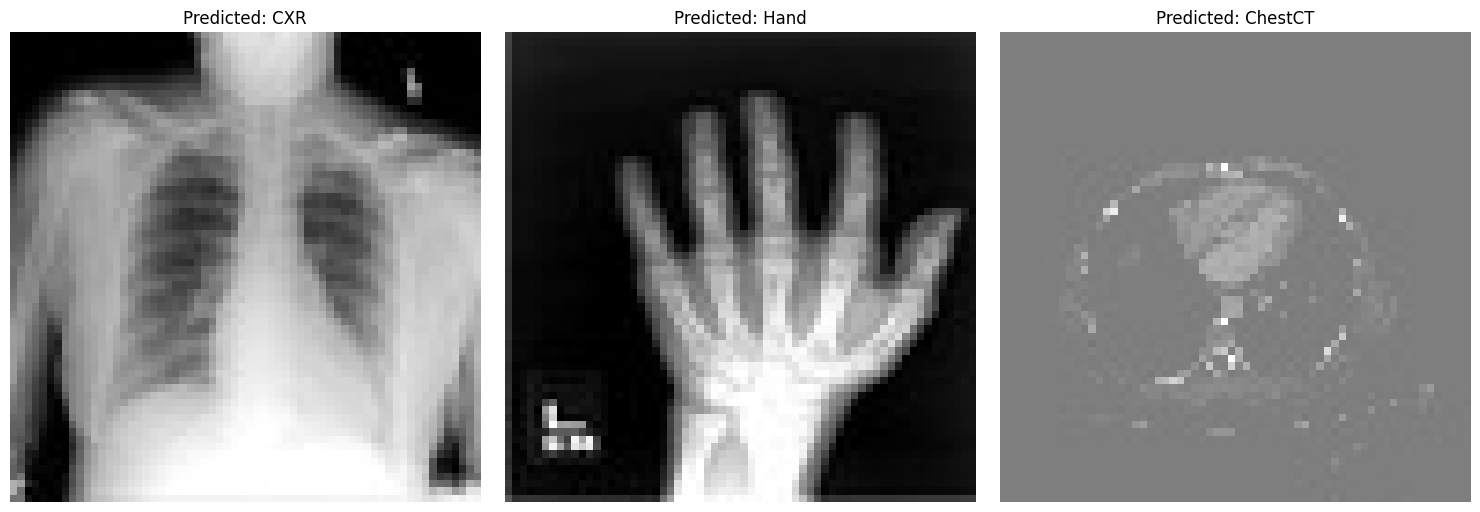

In [38]:
image_paths = [
    '/content/test/CXR/000002.jpeg',
    '/content/test/Hand/000002.jpeg',
    '/content/test/ChestCT/000104.jpeg',
]

class_names = list(train_data.class_indices.keys())
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(image_paths):

    img = image.load_img(img_path, target_size=(128, 128))


    img_array = image.img_to_array(img) / 255.0


    img_array = np.expand_dims(img_array, axis=0)


    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]


    plt.subplot(2, 3, i + 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()
